<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

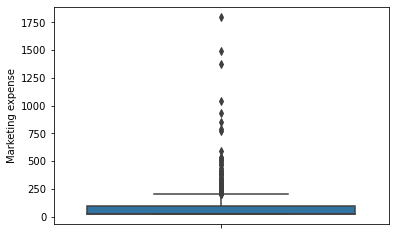

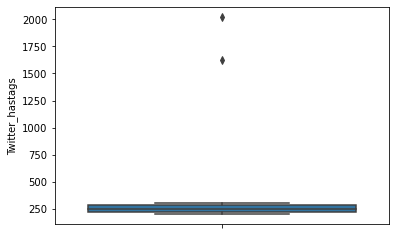

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

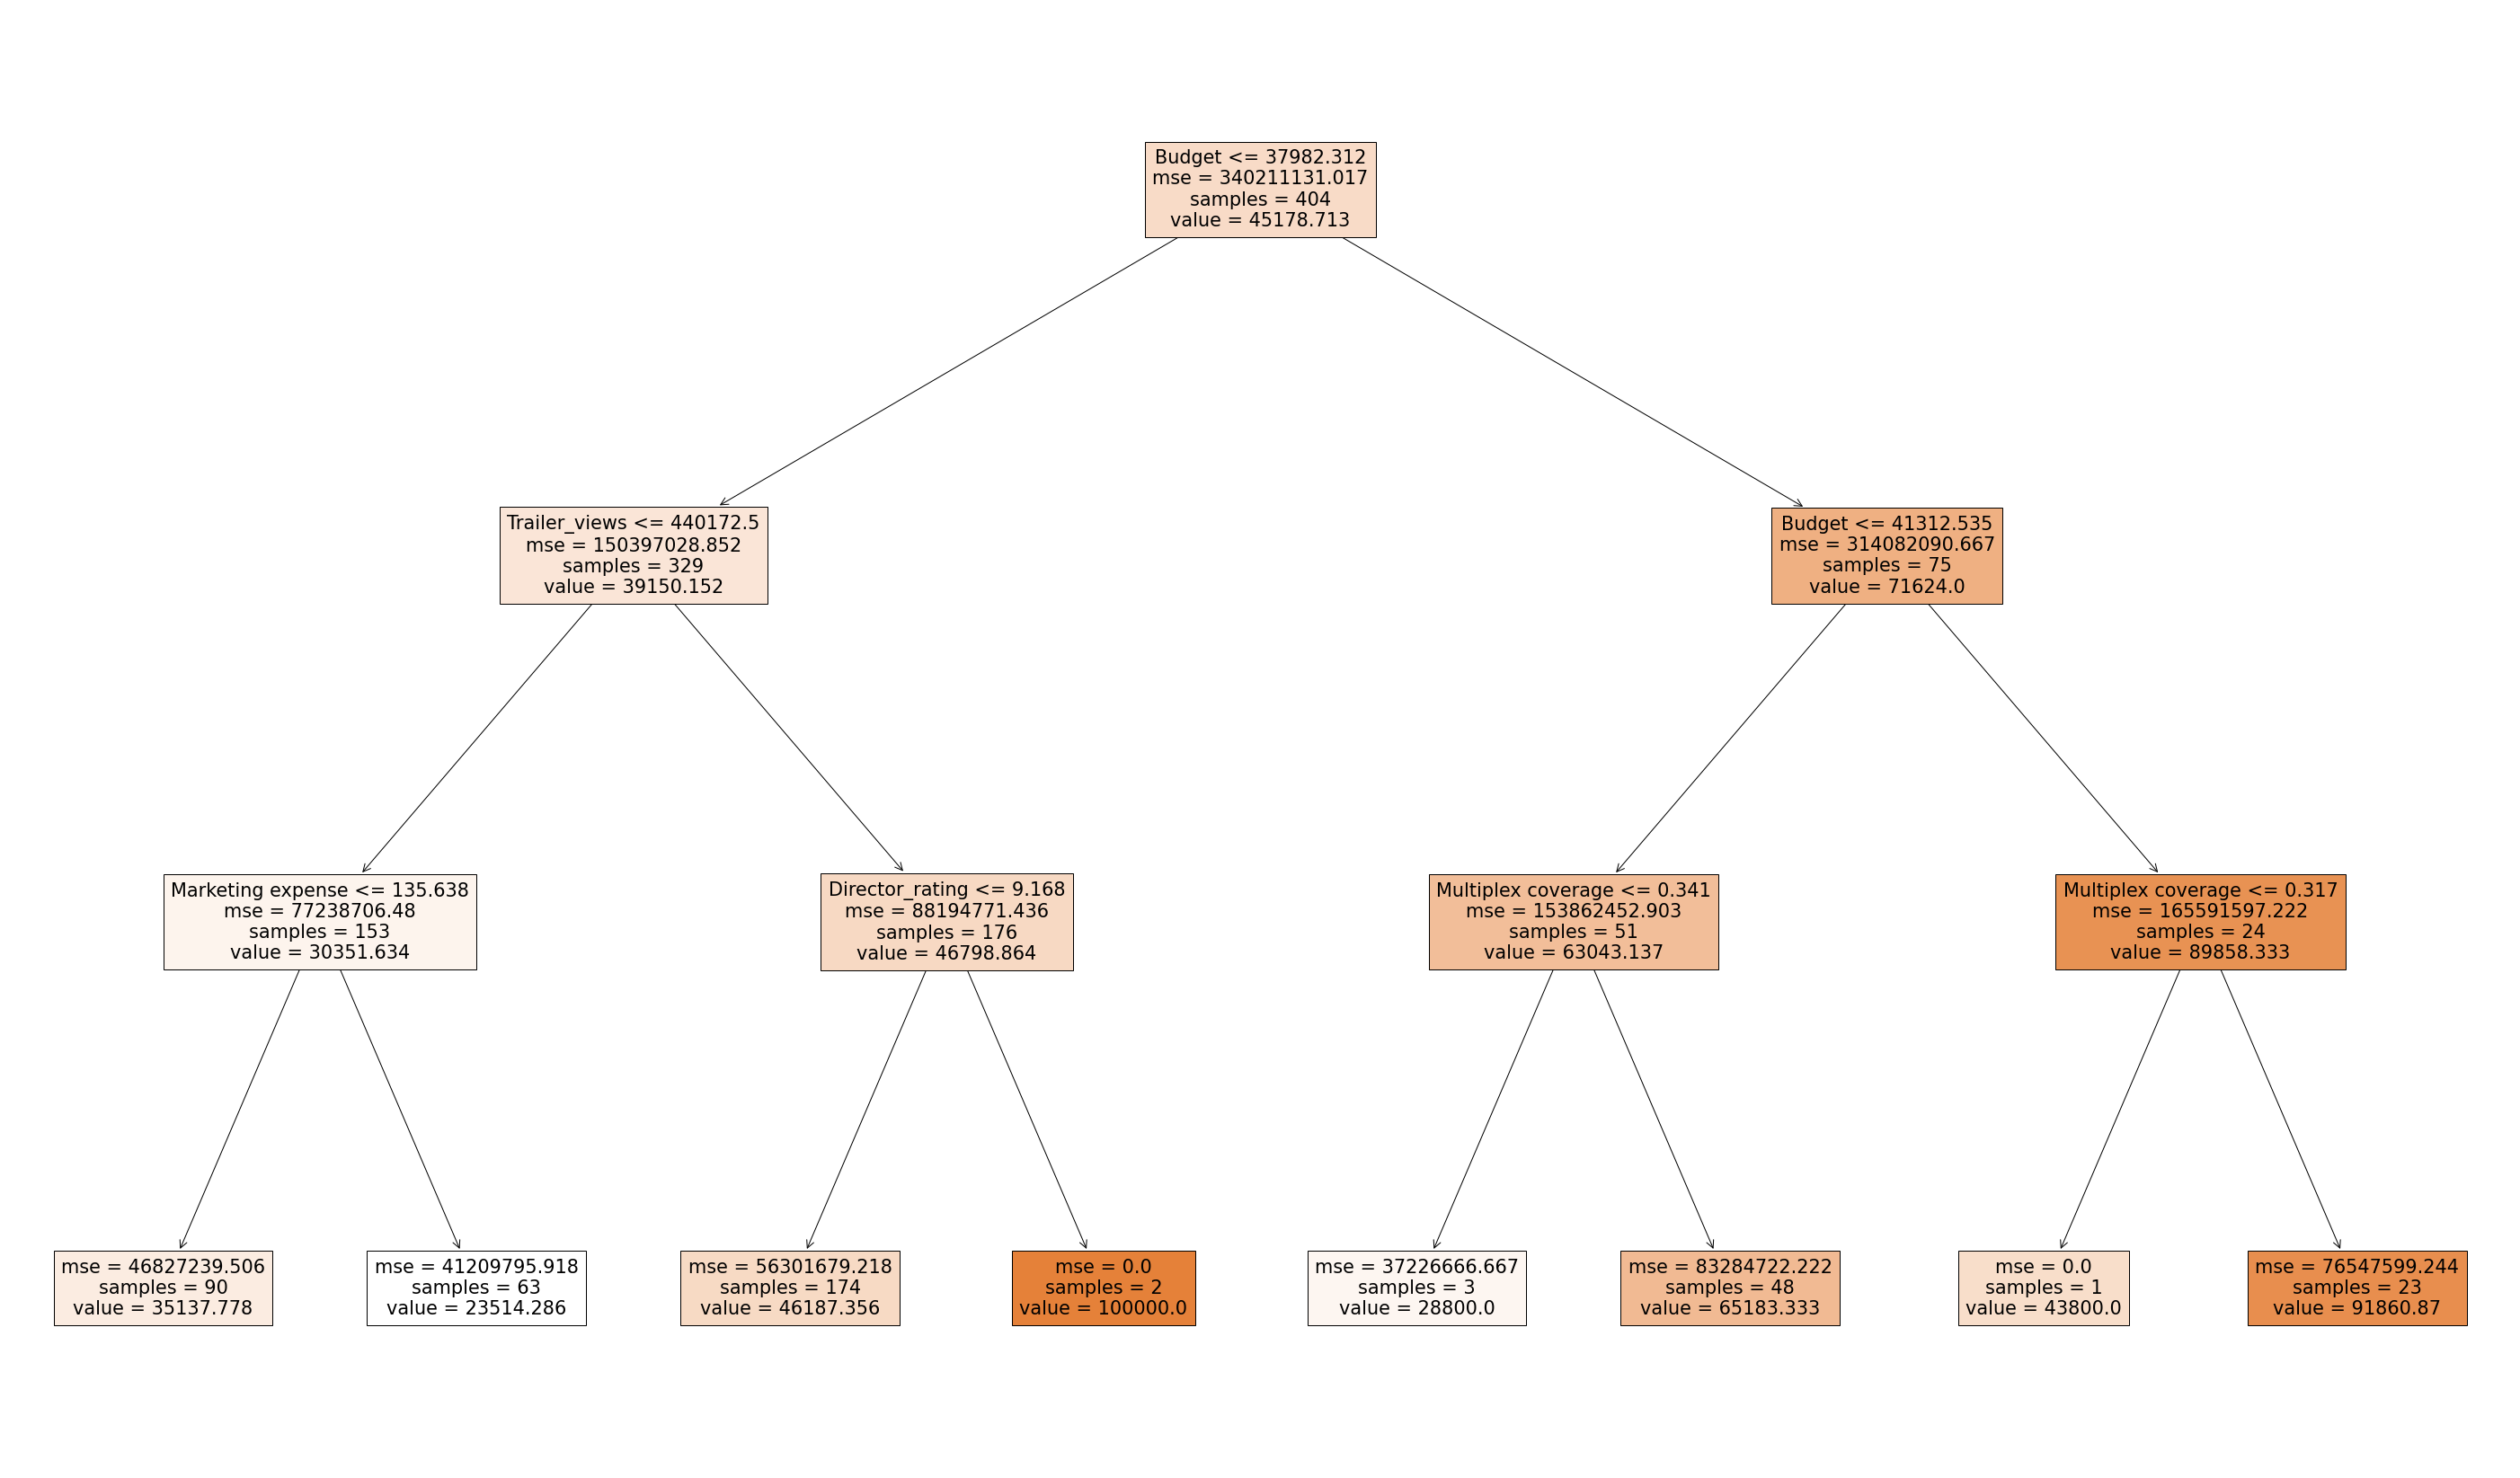

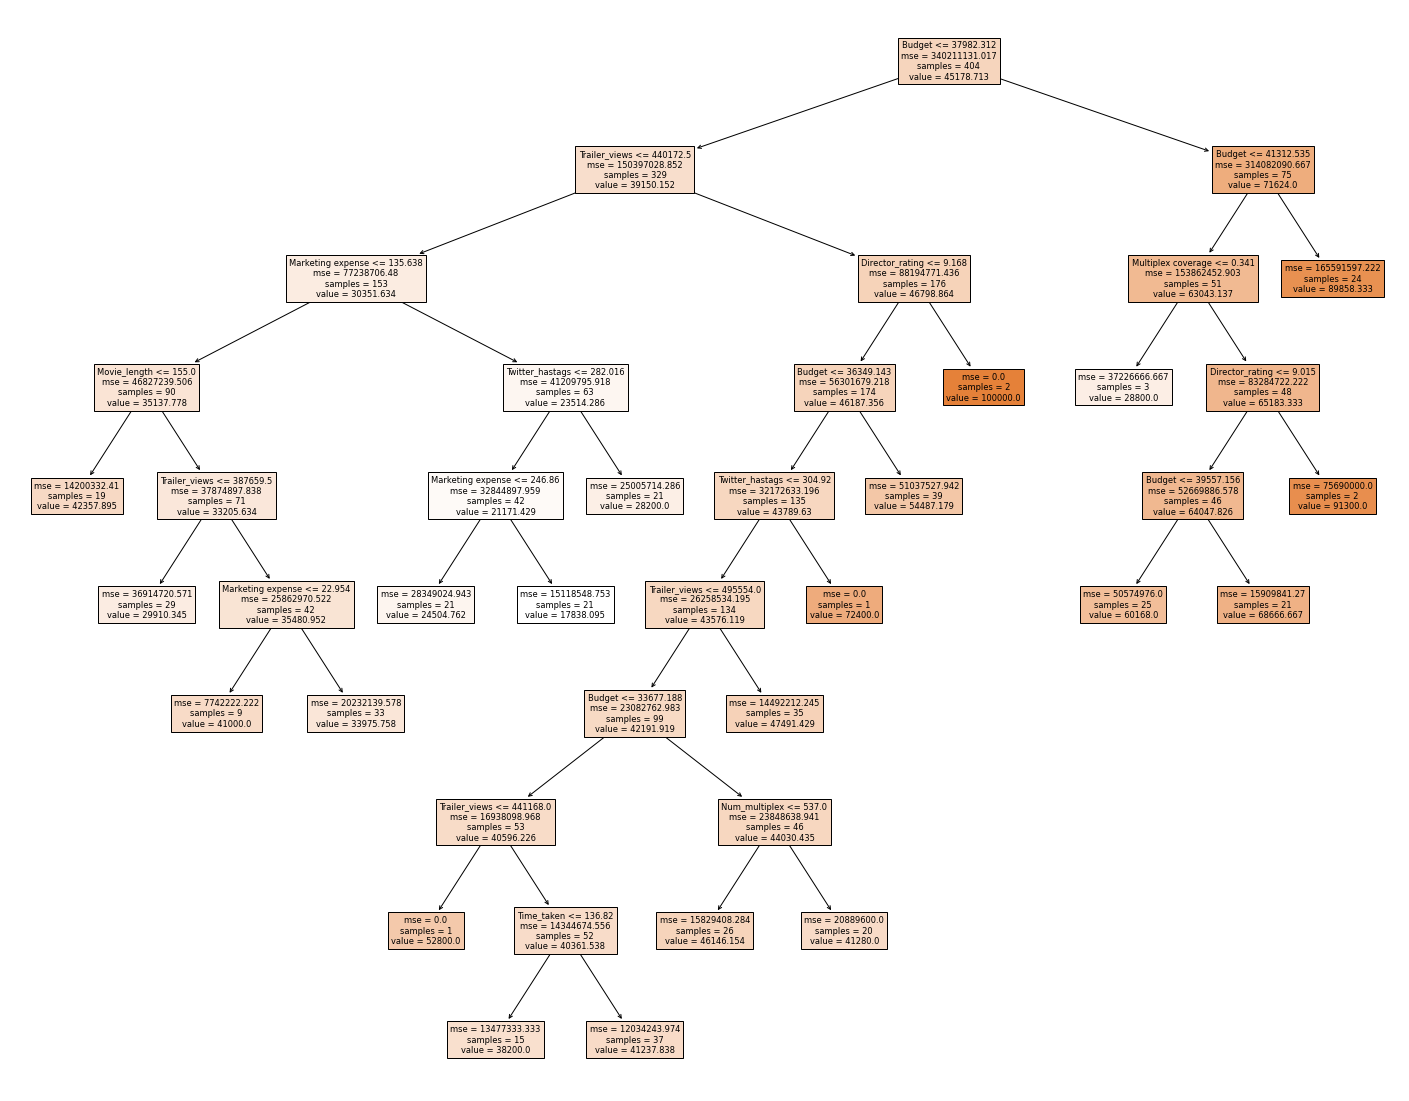

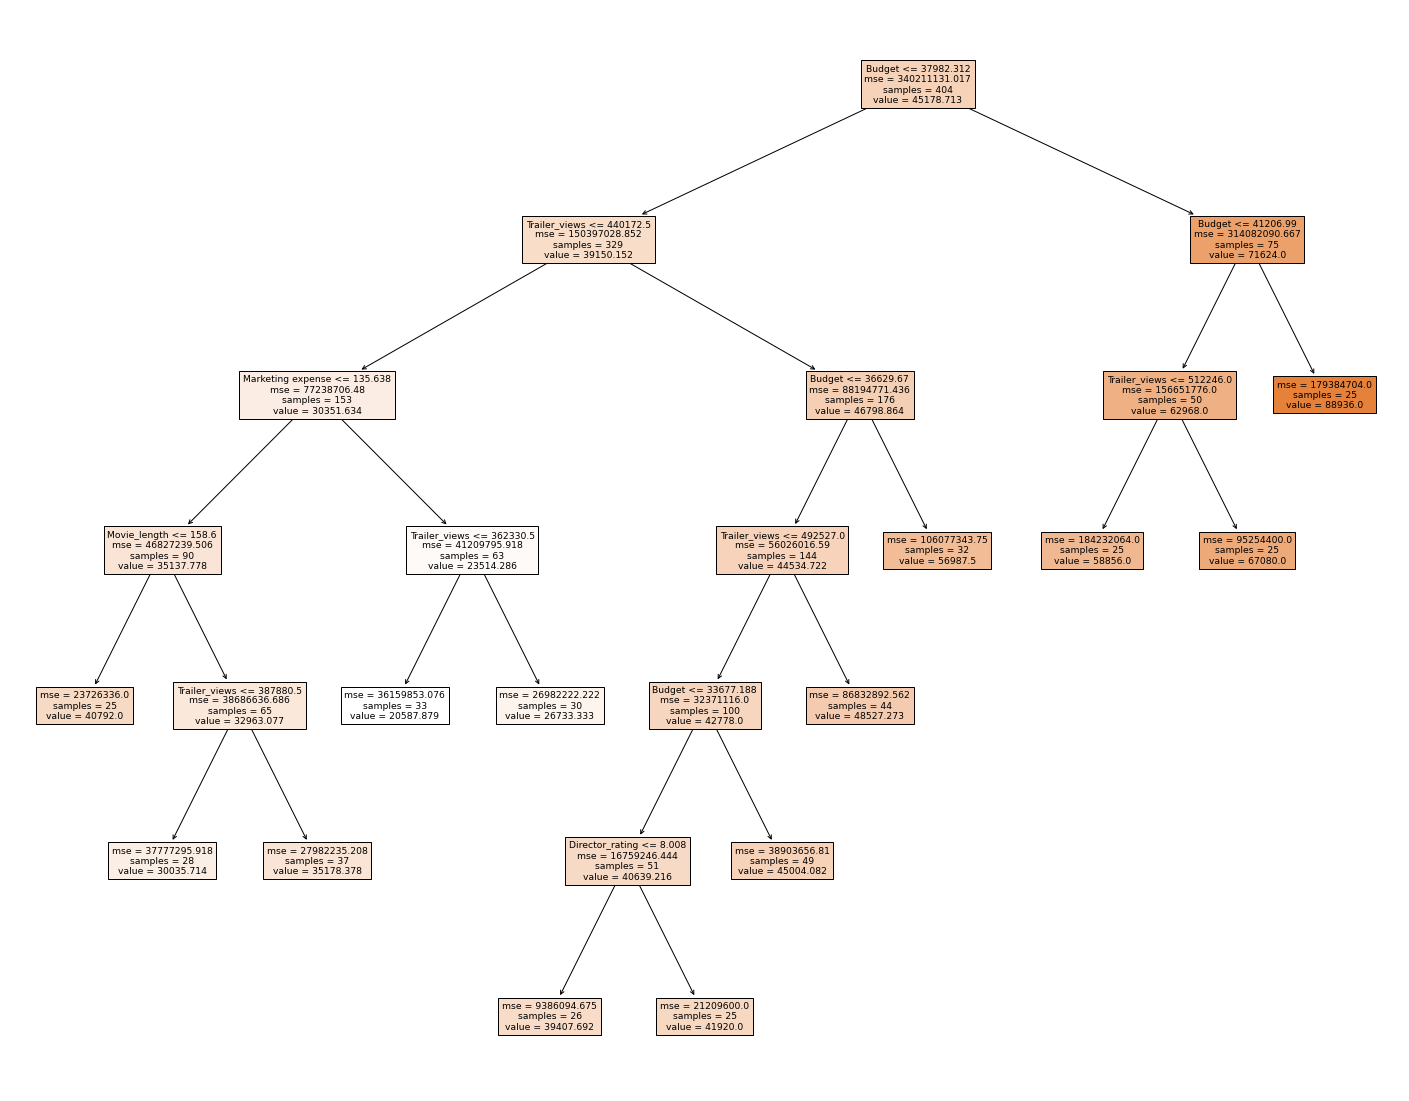

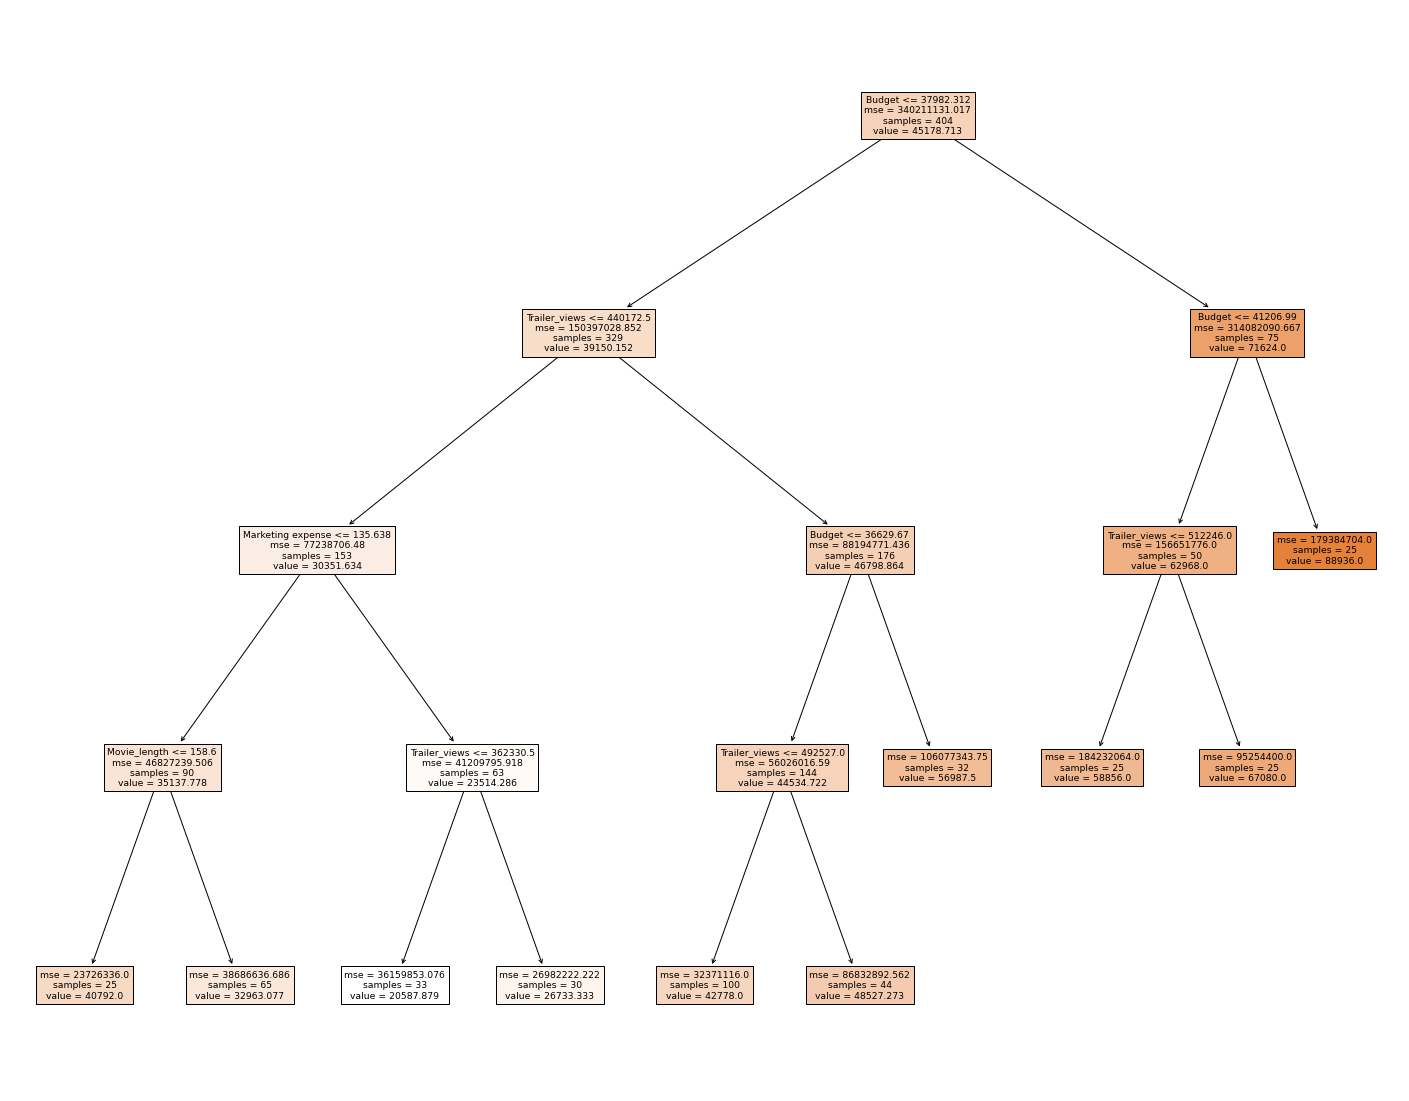

0.6370835812206892 10808.872969222446
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Av

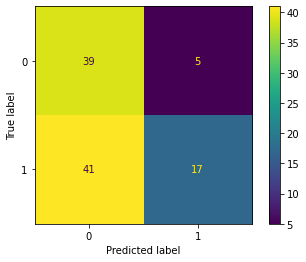

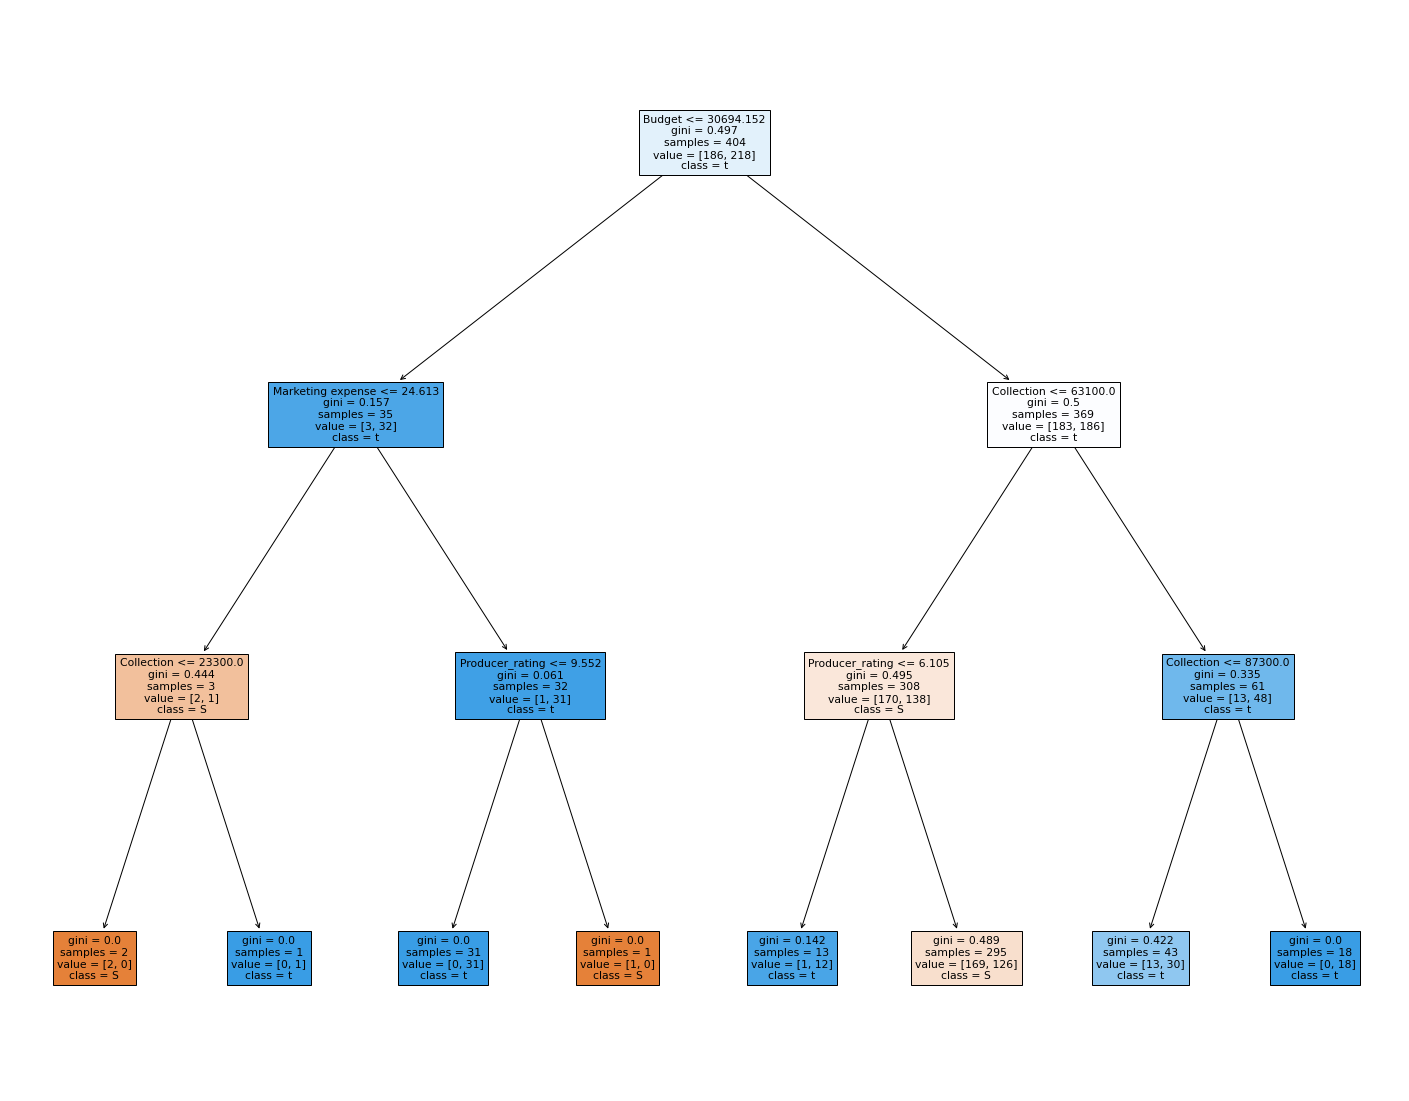

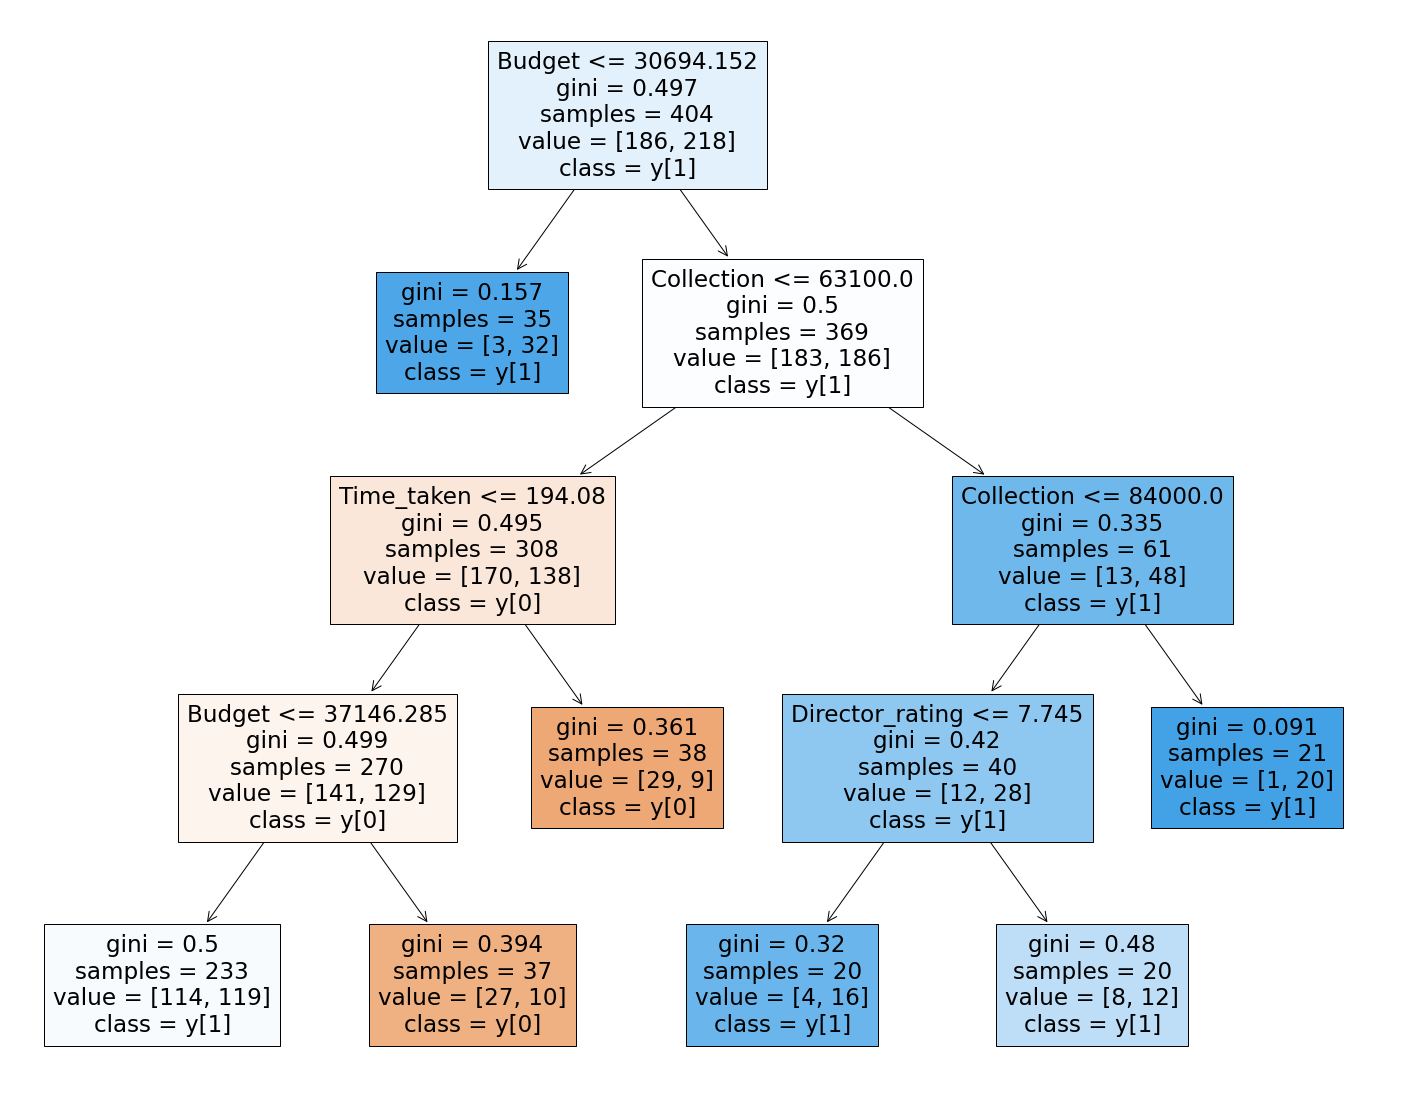

In [1]:
%run "Lecture_20 (Implementing Regression Tree).ipynb"
%run "Lecture_21 (Implementing Classification Trees).ipynb"

In [2]:
#import module
from sklearn.ensemble import RandomForestClassifier

In [3]:
#n_estimators = number of trees; n_jobs = 1 use all computer processing to run algorithm
rf_clf = RandomForestClassifier(n_estimators = 1000, n_jobs = 1, random_state = 42)

In [4]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=1, random_state=42)

In [5]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[25, 19],
       [18, 40]], dtype=int64)

In [6]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.6372549019607843

### Grid Search

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
rf_clf = RandomForestClassifier(n_estimators = 250, random_state = 42)

In [11]:
#define params grid in the form of a dictionary; remember that you can train the model for different hyperparameters like the complexity parameter
params_grid = {"max_features": [4, 5, 6, 7, 8, 9, 10],
              "min_samples_split": [2, 3, 10]}
params_grid

{'max_features': [4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 10]}

In [13]:
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs = -1, cv = 5, scoring = "accuracy") #estimator = rf; cv = cross validation

In [14]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [15]:
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 3}

In [17]:
opt_clf_rf = grid_search.best_estimator_

In [19]:
accuracy_score(y_test, opt_clf_rf.predict(X_test))

0.6274509803921569

In [20]:
confusion_matrix(y_test, opt_clf_rf.predict(X_test))

array([[25, 19],
       [19, 39]], dtype=int64)